# Climate change's effect on local food and water resources. 📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

This project will attempt to address if localized climate change has a detrimental effect on local crop production and water resources.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

1. Is climate change happening in my local area of Southeast Indiana?
2. Is climate change affecting the yield production of local crops, e.g., corn and soybean?
3. Is climate change affecting the water resources, i.e., is there an abundance or scarcity of water based on the amount of yearly rainfall? 

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

I hypothesize that climate change is occuring in Southeast Indiana, and it has affected local crop yield and reduced a percentage of available water resources.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

1. United States Department of Agriculture (USDA) - https://quickstats.nass.usda.gov
2. Local Climate Analysis Tool (LCAT) - https://lcat.nws.noaa.gov/home
3. National Centers for Environmental Information | Local Climatological Data (LCD) - https://www.ncei.noaa.gov/cdo-web/datatools/lcd
4. USA Facts - Ripley County, Indiana - https://usafacts.org/issues/climate/state/indiana/county/ripley-county/?endDate=2023-11-18&startDate=2013-02-01#climate/

I will relate these data sets by geographical locations, either at the state level or preferably at the county level. 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach is to join the climate data set to the agricultural data set on the specified region, Southeast Indiana.  I need to fully understand the NOAA weather data's schema to determine if my county, Ripley, is included in the Wilmington Station, which it should be.

Once I have identified that Wilmington Weather Station does indeed cover my local area, I will attempt to extrapolate the annual rainfall and temperature data to determine if there is a correlation between weather and crop yield.

# Import Packages/Libraries

In [256]:
# Start your code here

import pandas as pd
import numpy as np

import os
from dotenv import load_dotenv

# Load the project environment variables
load_dotenv(override=True)

import requests
from urllib.request import urlretrieve, urlparse
from bs4 import BeautifulSoup

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns



# Agricultural data from USDA National Agricultural Statistics Service (NASS)

### Data Source

"This product uses the NASS API but is not endorsed or certified by NASS."

In [257]:
# API KEY obtained from https://quickstats.nass.usda.gov/api/
API_KEY = os.getenv('API_KEY')

In [258]:
# URL='https://quickstats.nass.usda.gov/results/5707E545-6B9E-35A4-AF77-DAF0BA7D7A7B'

In [259]:
# API documentation: https://quickstats.nass.usda.gov/api
# Example URL = 'https://quickstats.nass.usda.gov/api/api_GET/?key=API_KEY&commodity_desc=CORN&year__GE=2010&state_alpha=VA'

url = 'https://quickstats.nass.usda.gov/api/api_GET/'
params = {
    "key":API_KEY,
    "commodity_desc":"CORN",
    "year__GE":"2010",
    "state_alpha":"IN",
    "county_name":"RIPLEY",
    "sector_desc":"CROPS",
    "source_desc":"SURVEY"
}

response = requests.get(url=url, params=params)
nass_data = str(response.json())

### Data Wrangling/Cleaning

#### Data Dictionary

|Column or Header Name|Max Length|Definition|
| --- | --- | --- |
|The "WHAT" (or Commodity) dimension|||
|source_desc|60|Source of data (CENSUS or SURVEY). Census program includes the Census of Ag as well as follow up projects. Survey program includes national, state, and county surveys.|
|(Program)|||
|sector_desc|60|Five high level, broad categories useful to narrow down choices (CROPS, ANIMALS & PRODUCTS, ECONOMICS, DEMOGRAPHICS, and ENVIRONMENTAL).|
|(Sector)|||
|group_desc|80|Subsets within sector (e.g., under sector = CROPS, the groups are FIELD CROPS, FRUIT & TREE NUTS, HORTICULTURE, and VEGETABLES).|
|(Group)|||
|commodity_desc|80|The primary subject of interest (e.g., CORN, CATTLE, LABOR, TRACTORS, OPERATORS).|
|(Commodity)|||
|class_desc|180|Generally a physical attribute (e.g., variety, size, color, gender) of the commodity.|
|prodn_practice_desc|180|A method of production or action taken on the commodity (e.g., IRRIGATED, ORGANIC, ON FEED).|
|util_practice_desc|180|Utilizations (e.g., GRAIN, FROZEN, SLAUGHTER) or marketing channels (e.g., FRESH MARKET, PROCESSING, RETAIL).|
|statisticcat_desc|80|The aspect of a commodity being measured (e.g., AREA HARVESTED, PRICE RECEIVED, INVENTORY, SALES).|
|(Category)|||
|unit_desc|60|The unit associated with the statistic category (e.g., ACRES, $ / LB, HEAD, $, OPERATIONS).|
|short_desc|512|A concatenation of six columns: commodity_desc, class_desc, prodn_practice_desc, util_practice_desc, statisticcat_desc, and unit_desc.|
|(Data Item)|||
|domain_desc|256|Generally another characteristic of operations that produce a particular commodity (e.g., ECONOMIC CLASS, AREA OPERATED, NAICS CLASSIFICATION, SALES). For chemical usage data, the domain describes the type of chemical applied to the commodity. The domain = TOTAL will have no further breakouts; i.e., the data value pertains completely to the short_desc.|
|(Domain)|||
|domaincat_desc (Domain Category)|512|Categories or partitions within a domain (e.g., under domain = SALES, domain categories include $1,000 TO $9,999, $10,000 TO $19,999, etc).|
|The "WHERE" (or Location) dimension|||
|agg_level_desc|40|Aggregation level or geographic granularity of the data (e.g., STATE, AG DISTRICT, COUNTY, REGION, ZIP CODE).|
|(Geographic Level)|||
|state_ansi|2|American National Standards Institute (ANSI) standard 2-digit state codes.|
|state_fips_code|2|NASS 2-digit state codes; include 99 and 98 for US TOTAL and OTHER STATES, respectively; otherwise match ANSI codes.|
|state_alpha|2|State abbreviation, 2-character alpha code.|
|state_name|30|State full name.|
|(State)|||
|asd_code|2|NASS defined county groups, unique within a state, 2-digit ag statistics district code.|
|asd_desc|60|Ag statistics district name.|
|(Ag District)|||
|county_ansi|3|ANSI standard 3-digit county codes.|
|county_code|3|NASS 3-digit county codes; includes 998 for OTHER (COMBINED) COUNTIES and Alaska county codes; otherwise match ANSI codes.|
|county_name|30|County name.|
|(County)|||
|region_desc|80|NASS defined geographic entities not readily defined by other standard geographic levels. A region can be a less than a state (SUB-STATE) or a group of states (MULTI-STATE), and may be specific to a commodity.|
|(Region)|||
|zip_5|5|US Postal Service 5-digit zip code.|
|(Zip Code)|||
|watershed_code|8|US Geological Survey (USGS) 8-digit Hydrologic Unit Code (HUC) for watersheds.|
|watershed_desc|120|Name assigned to the HUC.|
|(Watershed)|||
|congr_district_code|2|US Congressional District 2-digit code.|
|country_code|4|US Census Bureau, Foreign Trade Division 4-digit country code, as of April, 2007.|
|country_name|60|Country name.|
|location_desc|120|Full description for the location dimension.|
|The "WHEN" (or Time) dimension|||
|year|4|The numeric year of the data.|
|(Year)|||
|freq_desc|30|Length of time covered (ANNUAL, SEASON, MONTHLY, WEEKLY, POINT IN TIME). MONTHLY often covers more than one month. POINT IN TIME is as of a particular day.|
|(Period Type)|||
|begin_code|2|If applicable, a 2-digit code corresponding to the beginning of the reference period (e.g., for freq_desc = MONTHLY, begin_code ranges from 01 (January) to 12 (December)).|
|end_code|2|If applicable, a 2-digit code corresponding to the end of the reference period (e.g., the reference period of JAN THRU MAR will have begin_code = 01 and end_code = 03).|
|reference_period_|40|The specific time frame, within a freq_desc.|
|desc (Period)|||
|week_ending|10|Week ending date, used when freq_desc = WEEKLY.|
|load_time|19|Date and time indicating when record was inserted into Quick Stats database.|
|The Data Value|||
|value|24|Published data value or suppression reason code.|
|CV %|7|Coefficient of variation. Available for the 2012 Census of Agriculture only. County-level CVs are generalized.|


#### Data Loading

In [260]:
import io

nass_data = nass_data.replace("'", '"')
nass_df = pd.read_json(io.StringIO(nass_data), orient='records')
nass_df.head()

,data
0,"{'county_code': '137', 'sector_desc': 'CROPS',..."
1,"{'Value': '41,200', 'zip_5': '', 'short_desc':..."
2,"{'class_desc': 'ALL CLASSES', 'asd_code': '90'..."
3,"{'source_desc': 'SURVEY', 'statisticcat_desc':..."
4,"{'zip_5': '', 'short_desc': 'CORN - ACRES PLAN..."


In [261]:
# Reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# Reference: https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
# Reference: Bing Chat with GPT-4
# Reference: Github Copilot
# Iterate through df and convert JSON to dataframe
import json

dataframes = []
for index, row in nass_df.iterrows():
    json_data = row.to_json()
    json_clean = json_data[8:-1]
    my_dict = json.loads(json_clean)
    sorted_dict = dict(sorted(my_dict.items()))
    dataframe = pd.DataFrame.from_dict(sorted_dict, orient='index').T
    dataframes.append(dataframe)

# Concatenate all dataframes into a single dataframe
nass_combined_df = pd.concat(dataframes, ignore_index=True)
nass_combined_df.sample(10)


,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,congr_district_code,country_code,...,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5
18,,"46,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2015,
4,,"39,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2017,
44,,170.2,COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,YIELD,BU / ACRE,GRAIN,00000000,,,2013,
42,,158.7,COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,YIELD,BU / ACRE,GRAIN,00000000,,,2015,
22,,"44,600",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2011,
35,,"6,047,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,PRODUCTION,BU,GRAIN,00000000,,,2010,
9,,"48,400",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2012,
17,,"38,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2016,
15,,"38,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2018,
29,,"6,000,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,,9000,...,18,INDIANA,PRODUCTION,BU,GRAIN,00000000,,,2016,


In [262]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(result_df):
    # Drop columns: 'congr_district_code', 'region_desc', 'watershed_desc', 'week_ending', 'zip_5'
    result_df = result_df.drop(columns=['congr_district_code', 'region_desc', 'watershed_desc', 'week_ending', 'zip_5'])
    return result_df

nass_combined_df_clean = clean_data(nass_combined_df.copy())
nass_combined_df_clean.head()

,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,country_code,country_name,...,source_desc,state_alpha,state_ansi,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,year
0,0.50,"39,400",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2022
1,0.20,"41,200",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2021
2,0.3,"32,900",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2020
3,,"39,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2018
4,,"39,000",COUNTY,90,SOUTHEAST,00,ALL CLASSES,CORN,9000,UNITED STATES,...,SURVEY,IN,18,18,INDIANA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,2017


In [263]:
# Remove commas from the 'Value' column
nass_combined_df_clean['Value'] = nass_combined_df_clean['Value'].str.replace(',', '')
# convert the 'value' column to float dtype
nass_combined_df_clean = nass_combined_df_clean.astype({'Value': 'float64'})
nass_combined_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CV (%)                 48 non-null     object 
 1   Value                  48 non-null     float64
 2   agg_level_desc         48 non-null     object 
 3   asd_code               48 non-null     object 
 4   asd_desc               48 non-null     object 
 5   begin_code             48 non-null     object 
 6   class_desc             48 non-null     object 
 7   commodity_desc         48 non-null     object 
 8   country_code           48 non-null     object 
 9   country_name           48 non-null     object 
 10  county_ansi            48 non-null     object 
 11  county_code            48 non-null     object 
 12  county_name            48 non-null     object 
 13  domain_desc            48 non-null     object 
 14  domaincat_desc         48 non-null     object 
 15  end_code

In [264]:
# Split dataframe into four dataframes: one for each statistical category
area_planted = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'AREA PLANTED']
area_harvested = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'AREA HARVESTED']
yield_per_acre = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'YIELD']
production = nass_combined_df_clean[nass_combined_df_clean['statisticcat_desc'] == 'PRODUCTION']

In [265]:
nass_pivoted_df = nass_combined_df_clean.pivot(index='year', columns='statisticcat_desc', values='Value')
nass_pivoted_df


statisticcat_desc,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD
year,,,,
2010,44600.0,46000.0,6047000.0,135.6
2011,44600.0,45500.0,5040000.0,113.0
2012,47200.0,48400.0,4780000.0,101.3
2013,45000.0,46000.0,7659000.0,170.2
2014,47500.0,48000.0,8470000.0,178.3
2015,46000.0,47000.0,7300000.0,158.7
2016,38000.0,39000.0,6000000.0,157.9
2017,38300.0,39000.0,7120000.0,185.9
2018,38000.0,39000.0,6950000.0,182.9


In [266]:
print(area_planted.shape)
print(area_harvested.shape)
print(yield_per_acre.shape)
print(production.shape)
print(nass_combined_df_clean.shape)

(12, 34)
(12, 34)
(12, 34)
(12, 34)
(48, 34)


In [267]:
nass_pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2010 to 2022
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AREA HARVESTED  12 non-null     float64
 1   AREA PLANTED    12 non-null     float64
 2   PRODUCTION      12 non-null     float64
 3   YIELD           12 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes


### Data Visualization

In [268]:
# Correlation matrix of nass_pivoted_df
corr_matrix = nass_pivoted_df.corr()
corr_matrix

statisticcat_desc,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD
statisticcat_desc,,,,
AREA HARVESTED,1.000000,0.998818,0.153724,-0.534720
AREA PLANTED,0.998818,1.000000,0.129974,-0.554467
PRODUCTION,0.153724,0.129974,1.000000,0.751048
YIELD,-0.534720,-0.554467,0.751048,1.000000


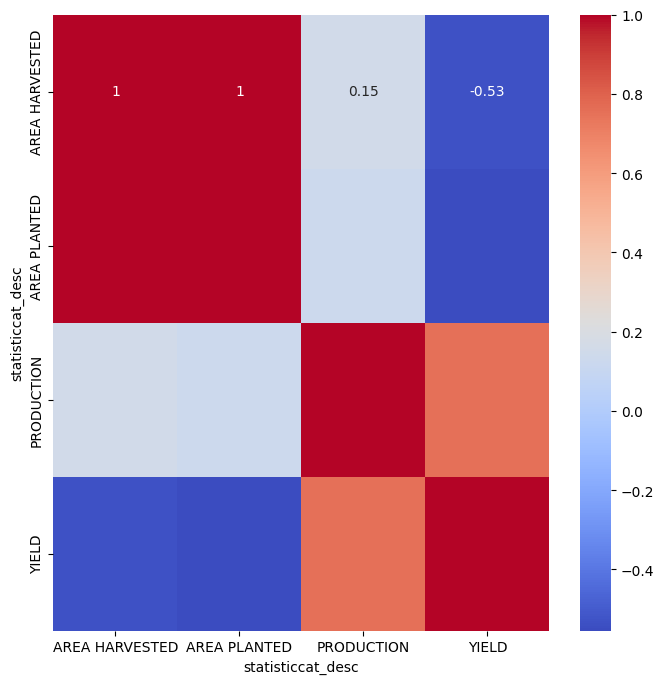

In [269]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Local Climatological Data (LCD)

In [270]:
# Read the CSV file into a dataframe
lcd_df = pd.read_csv('data\LCD_Columbus_Bakalar_Municipal_Airport_Indiana_US.csv', low_memory=False)

In [271]:
# Describe the dataframe
lcd_df.describe()

,STATION,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,BackupEquipment,BackupLatitude,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
count,6.194500e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1520.000000,1520.000000,0.0
mean,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.807237,1865.667763,NaN
std,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.803298,101.719409,NaN
min,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516.000000,1720.000000,NaN
25%,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.000000,1753.000000,NaN
50%,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.000000,1854.000000,NaN
75%,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736.000000,1948.000000,NaN
max,7.243631e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.000000,2014.000000,NaN


In [272]:
# Display the first 5 rows of the dataframe
lcd_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72436313803,2014-01-01T07:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72436313803,2014-01-01T08:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72436313803,2014-01-01T09:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72436313803,2014-01-01T10:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72436313803,2014-01-01T11:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
# Display a sample of 10 rows
lcd_df.sample(10)

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
57815,72436313803,2023-03-25T09:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,72436313803,2015-10-20T15:50:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18512,72436313803,2017-03-11T13:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57389,72436313803,2023-03-01T21:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13397,72436313803,2016-05-30T16:45:00,FM-15,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23787,72436313803,2018-01-02T19:55:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20928,72436313803,2017-07-23T18:56:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11738,72436313803,2016-02-24T18:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42510,72436313803,2020-11-09T16:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61940,72436313803,2023-11-15T16:45:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
# Display the info of the dataframe
lcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61945 entries, 0 to 61944
Columns: 124 entries, STATION to WindEquipmentChangeDate
dtypes: float64(106), int64(1), object(17)
memory usage: 58.6+ MB


In [275]:
# Remove columns that are missing more than 50% of the data
lcd_df = lcd_df.dropna(thresh=0.5*len(lcd_df), axis=1)
lcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61945 entries, 0 to 61944
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    61945 non-null  int64  
 1   DATE                       61945 non-null  object 
 2   REPORT_TYPE                61945 non-null  object 
 3   SOURCE                     61945 non-null  object 
 4   HourlyAltimeterSetting     60237 non-null  object 
 5   HourlyDewPointTemperature  58542 non-null  object 
 6   HourlyDryBulbTemperature   60296 non-null  object 
 7   HourlyRelativeHumidity     58498 non-null  float64
 8   HourlySkyConditions        57990 non-null  object 
 9   HourlyStationPressure      57896 non-null  object 
 10  HourlyVisibility           59924 non-null  object 
 11  HourlyWetBulbTemperature   56043 non-null  float64
 12  HourlyWindDirection        60306 non-null  object 
 13  HourlyWindSpeed            60277 non-null  obj

In [276]:
lcd_df.sample(10)

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1
60505,72436313803,2023-08-25T07:45:00,FM-15,7,29.93,77,81,89.0,FEW:02 100,29.23,8.00,78.0,240,5,MET07108/25/23 07:45:02 METAR KBAK 251245Z 240...,FM-15,7
42722,72436313803,2020-11-21T15:45:00,FM-15,7,30.42,39,45,81.0,OVC:08 70,29.71,10.00,42.0,030,9,MET07211/21/20 15:45:02 METAR KBAK 212045Z 030...,FM-15,7
49349,72436313803,2021-11-29T16:45:00,FM-15,7,30.04,12,43,29.0,BKN:07 90,29.34,10.00,32.0,180,13,MET07311/29/21 16:45:02 METAR KBAK 292145Z 180...,FM-15,7
4097,72436313803,2014-09-20T12:50:00,FM-15,7,30.03,66,77,69.0,SCT:04 40,29.33,7.00,70.0,230,14,MET07109/20/14 12:50:02 METAR KBAK 201750Z 230...,FM-15,7
16562,72436313803,2016-11-22T17:45:00,FM-15,7,30.26,28,39,65.0,*,29.55,10.00,35.0,110,6,MET07011/22/16 17:45:02 METAR KBAK 222245Z 110...,FM-15,7
33099,72436313803,2019-06-01T14:47:00,FM-15,7,29.86,59,79,51.0,SCT:04 46,29.16,10.00,67.0,250,9,MET07206/01/19 14:47:02 METAR KBAK 011947Z 250...,FM-15,7
12954,72436313803,2016-05-05T14:45:00,FM-15,7,29.91,50,57,77.0,SCT:04 28 BKN:07 48,29.21,10.00,53.0,320,13,MET07905/05/16 14:45:02 METAR KBAK 051945Z 320...,FM-15,7
34314,72436313803,2019-08-06T17:52:00,FM-15,7,29.80,68,84,58.0,SCT:04 50,29.10,10.00,73.0,310,3,MET07208/06/19 17:52:02 METAR KBAK 062252Z 310...,FM-15,7
45294,72436313803,2021-04-16T05:30:00,FM-15,7,30.00,32,32,100.0,CLR:00,29.30,10.00,32.0,000,0,MET07504/16/21 05:30:01 METAR KBAK 161030Z 000...,FM-15,7
12927,72436313803,2016-05-04T08:34:00,FM-15,7,29.70,50,50,100.0,SCT:04 28 BKN:07 47 OVC:08 50,29.00,8.00,50.0,230,9,MET08905/04/16 08:34:02 METAR KBAK 041334Z 230...,FM-15,7


# USA Facts Dataset

### Data Source

In [277]:
# Read the CSV file into a dataframe
precip_df = pd.read_csv(r'data\USAFacts_Ripley_County_Indiana_Precipitation.csv', low_memory=False, quotechar='"', encoding='utf-8')

### Data Wrangling/Cleaning

In [279]:
# Remove the 0 from the column names and trim the column names
precip_df.columns = precip_df.columns.str.replace('0', '').str.strip()
precip_df.columns

Index(['AGENCY', 'DATA', 'DATA TYPE', 'LOCATION', 'LOCATION TYPE', 'SOURCE',
       'SOURCE TYPE', 'SUBJECT', 'TIME', 'TIME TYPE'],
      dtype='object')

In [283]:
# Create a new column 'year' from the 'time' column
precip_df['YEAR'] = precip_df['TIME'].str[:4].astype('int64')
precip_df.head()

,AGENCY,DATA,DATA TYPE,LOCATION,LOCATION TYPE,SOURCE,SOURCE TYPE,SUBJECT,TIME,TIME TYPE,YEAR
0,National Centers for Environmental Information,0.32,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1910-03,ISO_DATE,1910
1,National Centers for Environmental Information,1.83,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1937-11,ISO_DATE,1937
2,National Centers for Environmental Information,3.40,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1923-03,ISO_DATE,1923
3,National Centers for Environmental Information,1.71,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1916-11,ISO_DATE,1916
4,National Centers for Environmental Information,6.65,STRING,Ripley,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1906-03,ISO_DATE,1906


In [287]:
# Calculate the mean precipitation for each year using the 'DATA' and 'YEAR' columns
precip_df_mean = precip_df[['DATA', 'YEAR']].groupby('YEAR').mean()
precip_df_mean.head()


,DATA
YEAR,
1895,2.682500
1896,3.402500
1897,3.943333
1898,4.281667
1899,3.500000


In [288]:
# Filter the dataframe to include only the years 2013-2023
precip_df_mean = precip_df_mean.loc[2013:2023]
precip_df_mean.head()

,DATA
YEAR,
2013,3.755000
2014,3.655000
2015,4.243333
2016,3.939167
2017,4.392500


### Data Visualization

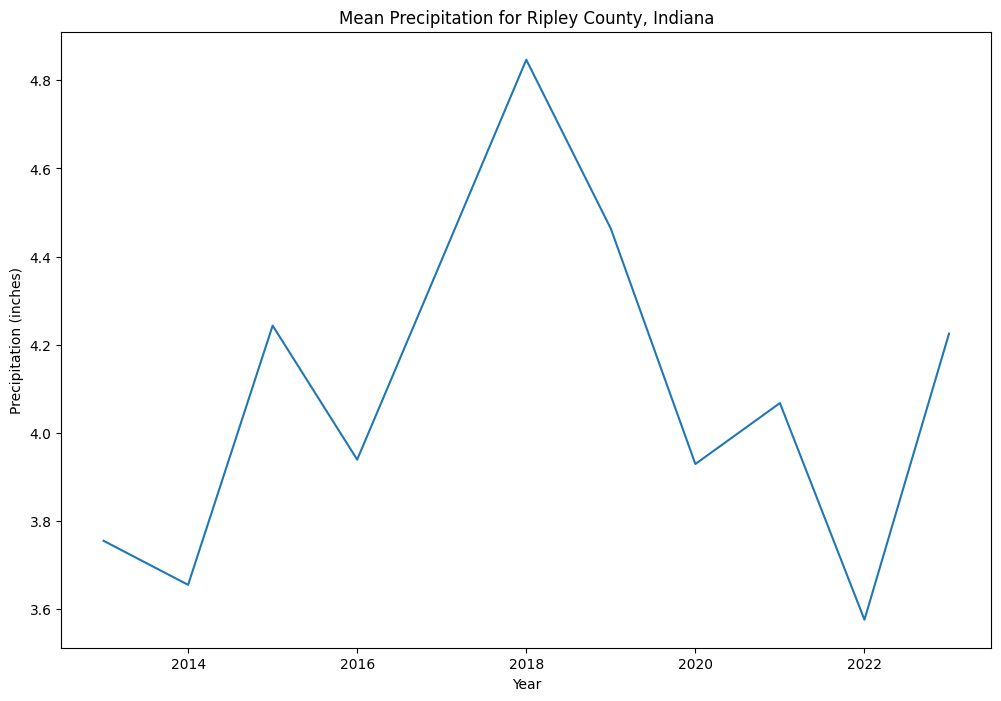

In [291]:
# Plot the mean precipitation for each year
plt.figure(figsize=(12, 8))
plt.plot(precip_df_mean.index, precip_df_mean['DATA'])
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Mean Precipitation for Ripley County, Indiana')
plt.show()

IndyStar, Ripley County, Indiana Aggregated Weather Data

In [ ]:
indy_star_summary_url = 'https://data.indystar.com/weather-data/ripley-county/18137/2023-07-01/?syear=1895&eyear=2023#summary'
indy_star_table_url = 'https://data.indystar.com/weather-data/ripley-county/18137/2023-07-01/table/'

In [ ]:
page = requests.get(indy_star_table_url)
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify())

In [ ]:
tables = soup.find_all('table')
weather_data = pd.read_html(str(tables[0]))[0]
weather_data.head()

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
* Data source references listed above
* Bing Chat with GPT-4
* https://www.ncei.noaa.gov/data/local-climatological-data/doc/LCD_documentation.pdf
* https://www.ncdc.noaa.gov/cdo-web/datasets
*

In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb